### PROJETO DE OTIMIZAÇÃO 
- ALUNAS : Isabelly Rodrigues E Maria Carolina
- DESCRIÇÃO : Analisar a aplicação do modelo de Markowitz na construção de uma carteira composta por trinta ativos, verificando a melhor alocação que minimize o risco para um dado nível de retorno esperado, por meio da determinação da fronteira eficiente.

In [1]:
from pyomo.environ import SolverFactory

print("\n--- Verificação da Instalação ---")
print("Pyomo instalado com sucesso.")

# Verifique se o Ipopt está disponível
ipopt_solver = SolverFactory("ipopt")
print(f"Ipopt disponível para Pyomo: {ipopt_solver.available()}")

if ipopt_solver.available():
    print("O solver Ipopt está pronto para ser usado.")
else:
    print("O solver Ipopt não foi encontrado. Verifique a instalação.")



--- Verificação da Instalação ---
Pyomo instalado com sucesso.
Ipopt disponível para Pyomo: False
O solver Ipopt não foi encontrado. Verifique a instalação.


In [6]:
#Acho legal a gente escolher as trinta empresas com base em cada setor 

import pandas as pd
import yfinance as yf
import os

# --- Listas de tickers por setor ---
tickers_Financeiro = [
    'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA', 'ITSA4.SA', 'BBAS3.SA'
]
tickers_Energia = [
    'EQTL3.SA', 'CMIG4.SA', 'CPFE3.SA', 'EGIE3.SA', 'ENGI3.SA'
]
tickers_Industriais = [
    'AZUL4.SA', 'MRVE3.SA', 'SBSP3.SA', 'ECOR3.SA', 'WEGE3.SA'
]
tickers_Consumo = [
    'ABEV3.SA', 'MGLU3.SA', 'LREN3.SA', 'CVCB3.SA', 'BRFS3.SA'
]
tickers_Tecnologia = [
    'LWSA3.SA', 'POSI3.SA', 'TOTS3.SA', 'VIVT3.SA', 'MLAS3.SA'
]
tickers_Saude = [
    'HAPV3.SA', 'QUAL3.SA', 'RDOR3.SA', 'FLRY3.SA', 'DASA3.SA'  
]

# Junta todos os tickers em uma lista única
todos_tickers = (
    tickers_Financeiro + tickers_Energia +
    tickers_Industriais + tickers_Consumo +
    tickers_Tecnologia + tickers_Saude
)

# --- Parâmetros de data ---
data_inicio = "2025-01-01"
data_fim = "2025-09-30"

# --- Baixar dados ---
try:
    dados = yf.download(todos_tickers, start=data_inicio, end=data_fim, group_by="ticker")
except Exception as e:
    print(f"Ocorreu um erro ao baixar os dados: {e}")
    dados = None

if dados is not None and not dados.empty:
    precos = {}

    # loop por ticker, pega "Adj Close" se existir, senão "Close"
    for ticker in todos_tickers:
        try:
            df_ticker = dados[ticker]
            if "Adj Close" in df_ticker.columns:
                precos[ticker] = df_ticker["Adj Close"]
            else:
                precos[ticker] = df_ticker["Close"]
        except Exception:
            print(f"⚠️ Não foi possível obter dados para {ticker}")

    df_precos = pd.DataFrame(precos)

    # Calcula retornos diários
    retornos_diarios = df_precos.pct_change().dropna()
    retornos_diarios.columns = [col.replace(".SA", "") for col in retornos_diarios.columns]

    # --- Salvar CSV ---
    diretorio_destino = "dados"
    os.makedirs(diretorio_destino, exist_ok=True)

    nome_arquivo = "retornos_acoes_ibovespa_2025.csv"
    caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

    retornos_diarios.to_csv(caminho_completo_csv, index=True)

    print("✅ Retornos diários calculados:")
    print(retornos_diarios.head())
    print(f"\n📁 Arquivo salvo em: {caminho_completo_csv}")
else:
    print("❌ Não foi possível baixar os dados.")



C:\Users\Carolina\AppData\Local\Temp\ipykernel_1304\970460415.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(todos_tickers, start=data_inicio, end=data_fim, group_by="ticker")
[*********************100%***********************]  30 of 30 completed
C:\Users\Carolina\AppData\Local\Temp\ipykernel_1304\970460415.py:62: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_diarios = df_precos.pct_change().dropna()


✅ Retornos diários calculados:
               ITUB4     BBDC4     B3SA3     ITSA4     BBAS3     EQTL3  \
Date                                                                     
2025-01-03 -0.024534 -0.015906 -0.009804 -0.017281 -0.007525 -0.017964   
2025-01-06  0.044936  0.019643  0.027723  0.032825  0.009267  0.035061   
2025-01-07  0.010911  0.014010 -0.006744  0.007945  0.012104  0.018631   
2025-01-08 -0.016190 -0.015544 -0.000970 -0.019144 -0.003711 -0.023853   
2025-01-09  0.002581 -0.007018 -0.009709  0.008037  0.004553  0.008145   

               CMIG4     CPFE3     EGIE3     ENGI3  ...     LWSA3     POSI3  \
Date                                                ...                       
2025-01-03 -0.021661 -0.013367 -0.001414 -0.044890  ... -0.006154  0.020080   
2025-01-06  0.000922  0.018710 -0.001133  0.043000  ...  0.027864  0.031496   
2025-01-07  0.023963  0.007600  0.008789 -0.017258  ...  0.039157 -0.005725   
2025-01-08 -0.024302 -0.004085 -0.012085  0.003902  ...

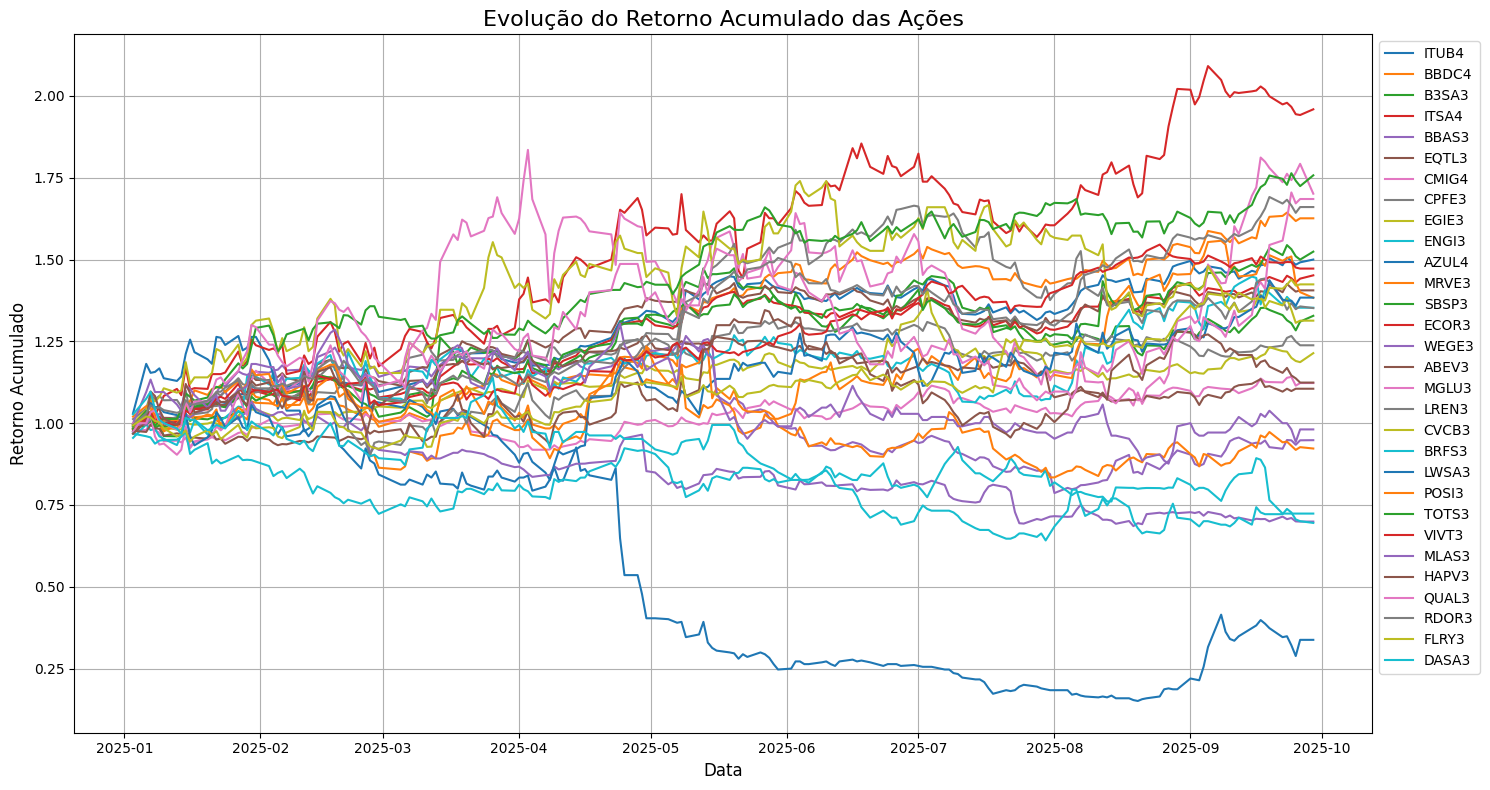


Gráfico salvo em 'dados\retornos_acoes_ibovespa_2024.png'


<Figure size 640x480 with 0 Axes>

In [7]:
# --- Adicionando o Gráfico de Retorno Acumulado ---
import matplotlib.pyplot as plt

# 1. Calcule o retorno acumulado
retorno_acumulado = (1 + retornos_diarios).cumprod()

# 2. Crie a figura e o eixo do gráfico
plt.figure(figsize=(15, 8))

# 3. Plote o gráfico
plt.plot(retorno_acumulado)

# 4. Adicione títulos e rótulos
plt.title('Evolução do Retorno Acumulado das Ações', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.grid(True)

# 5. Adicione a legenda com os nomes das ações
plt.legend(retorno_acumulado.columns, loc='upper left', bbox_to_anchor=(1, 1))

# 6. Melhore a formatação do eixo y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# 7. Ajuste o layout e mostre o gráfico
plt.tight_layout()
plt.show()

# 8. (Opcional) Salve o gráfico em um arquivo
try:
    caminho_completo_grafico = os.path.join(diretorio_destino, 'retornos_acoes_ibovespa_2024.png')
    plt.savefig(caminho_completo_grafico)
    print(f"\nGráfico salvo em '{caminho_completo_grafico}'")
except Exception as e:
    print(f"\nErro ao salvar o gráfico: {e}")

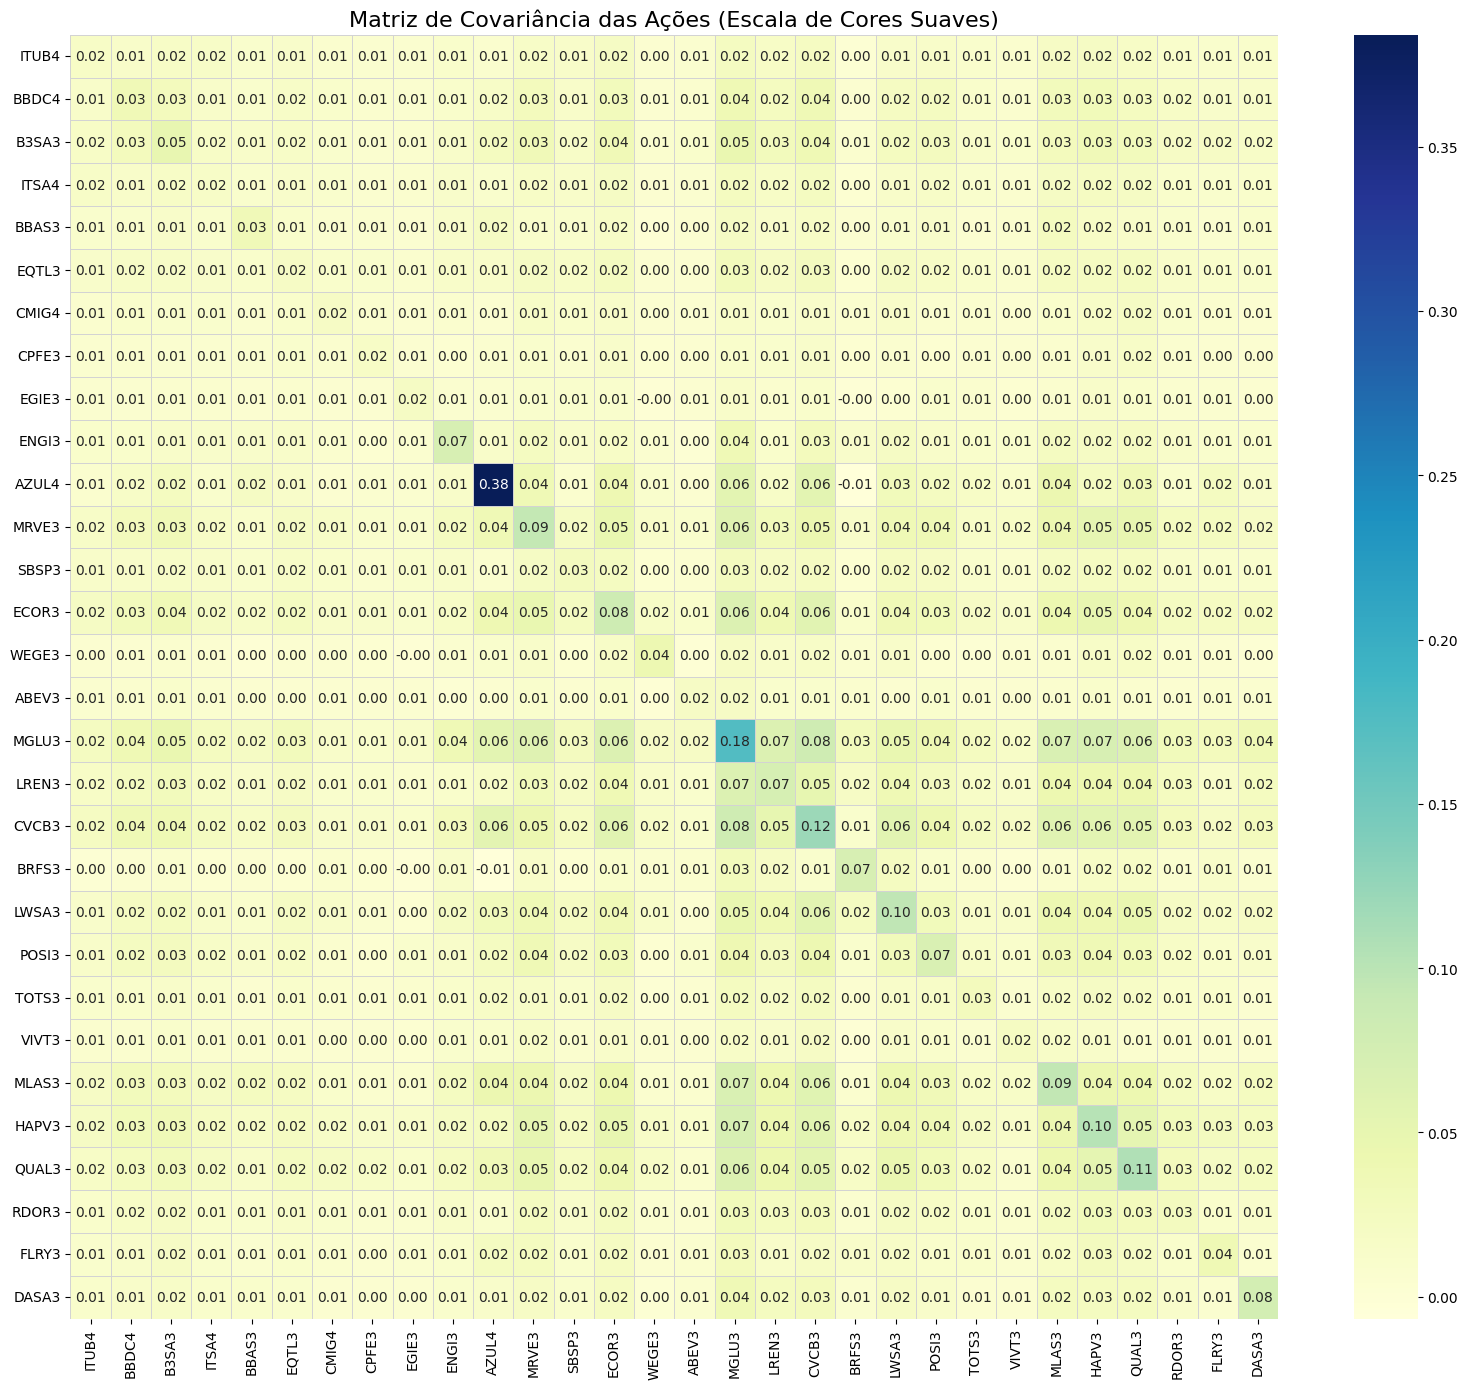


Matriz de covariância (heatmap) com cores suaves salva em 'dados\matriz_covariancia_heatmap_suave_2024.png'


<Figure size 640x480 with 0 Axes>

In [8]:
# --- Adicionando a Matriz de Variância e Covariância (Heatmap) com cores mais suaves ---
import seaborn as sns
import matplotlib.pyplot as plt # Certifique-se de que matplotlib.pyplot também está importado

if not retornos_diarios.empty:
    # 1. Calcule a matriz de covariância
    matriz_covariancia = retornos_diarios.cov()*100

    # 2. Crie a figura e o eixo para o mapa de calor
    plt.figure(figsize=(16, 14)) # Ajuste o tamanho conforme o número de ações

    # 3. Plote o mapa de calor com um colormap mais suave (ex: "YlGnBu", "Blues", "light:#0072B2")
    # 'cmap="YlGnBu"' é uma boa escolha para suavidade e progressão
    sns.heatmap(matriz_covariancia, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, linecolor='lightgray')

    # 4. Adicione título
    plt.title('Matriz de Covariância das Ações (Escala de Cores Suaves)', fontsize=16)
    plt.xticks(rotation=90) # Rotaciona os nomes das colunas para melhor leitura
    plt.yticks(rotation=0)  # Mantém os nomes das linhas na horizontal

    # 5. Ajuste o layout e mostre o gráfico
    plt.tight_layout()
    plt.show()

    # 6. (Opcional) Salve o gráfico em um arquivo
    try:
        caminho_completo_heatmap = os.path.join(diretorio_destino, 'matriz_covariancia_heatmap_suave_2024.png')
        plt.savefig(caminho_completo_heatmap)
        print(f"\nMatriz de covariância (heatmap) com cores suaves salva em '{caminho_completo_heatmap}'")
    except Exception as e:
        print(f"\nErro ao salvar o gráfico do heatmap com cores suaves: {e}")
else:
    print("\nNão foi possível gerar a matriz de covariância pois o DataFrame de retornos está vazio.")